### Watershed Algorithm

In [127]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image 

In [11]:
def display(image, cmap='gray'):
    figure = plt.figure(figsize=(10,8))
    ax = figure.add_subplot(111)
    ax.imshow(image, cmap='gray')

In [ ]:
'''
-> In geography, a watershed is a land area that channels rainfall and snowmelt to creeks, streams and rivers and 
   eventually outflow points such as reservoirs, bays and the ocean.
-> These watershed can then be segmented as tropographical maps with boundaries.
-> Metaophorically, the watershed algorithm treansformation treats the image it operates upon like a topographic map, with
   the brightness of each point representing its height, and finds the lines that run along the tops of ridges
-> Any grayscale image can be viewed as a topographic surface where high intensity denotes peaks and hills while low intensity denotes valleys
-> The algorithm can then fill every isolated valleys(local minima) with different colored water(labels).
-> As the 'water' rises, depending on the peaks(gradients) nearby, 'water' from different valleys(differnt segments of the image), with different colors
   could start to merge
-> To avoid this merging, the algorithm creates barriers(segment edge boundaires) in locations where 'water' merges.
-> This algorithm is especially useful for segmenting images into background and foreground in situations that are difficult for other algorithms
-> Ex: Coins next to each other on a table

'''

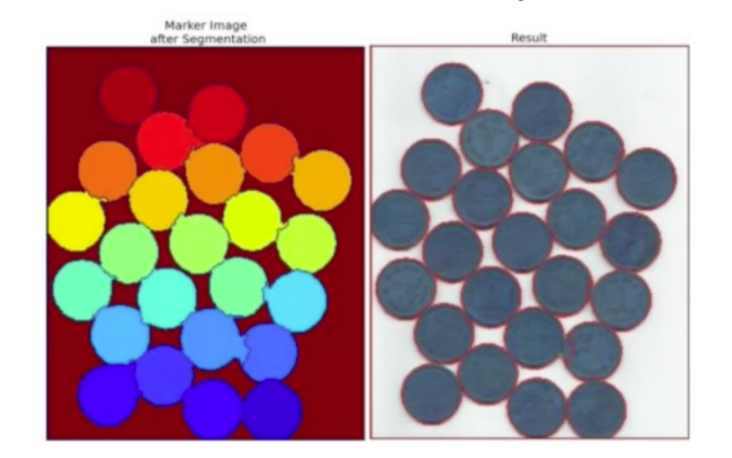

In [134]:
Image(filename='../images/UDEMY_computer_vision_Joseph_Portilla/computer_vision6_object_detection8.png', height=200, width=500)

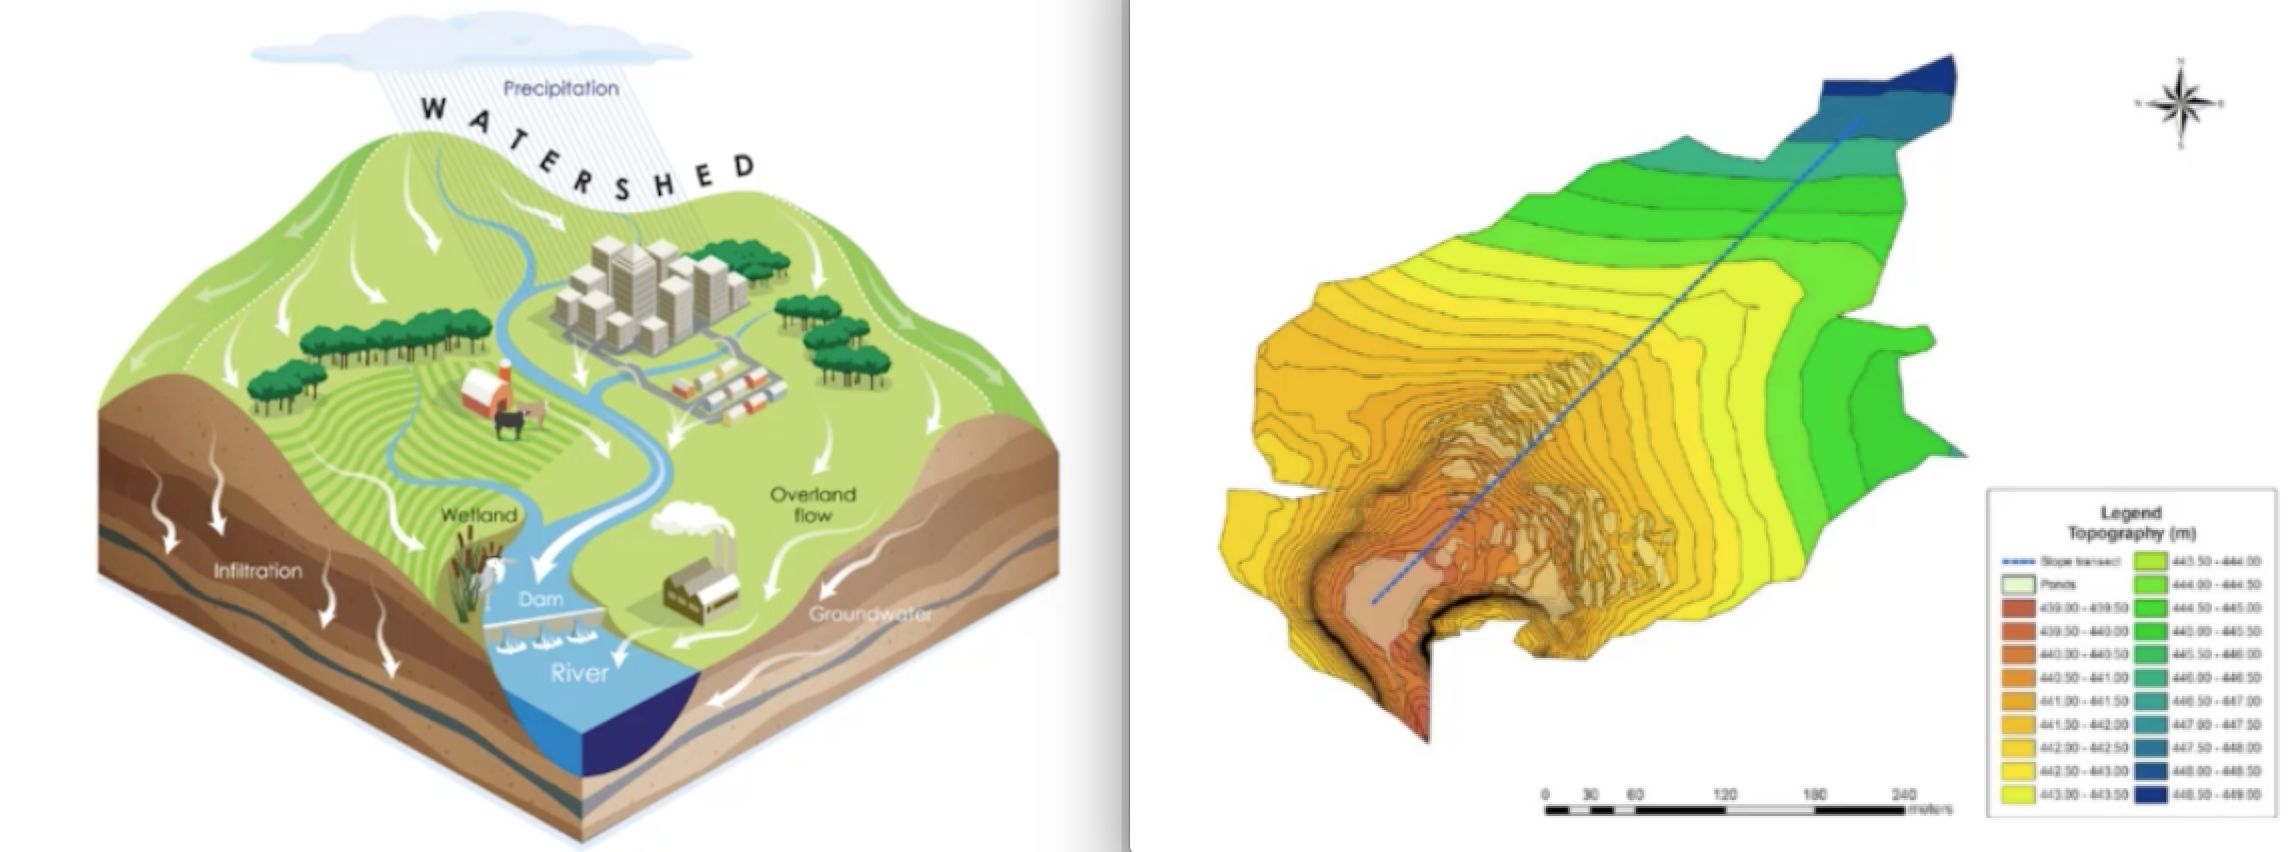

In [138]:
Image(filename='../images/UDEMY_computer_vision_Joseph_Portilla/computer_vision6_object_detection9.png', height=400, width=800)

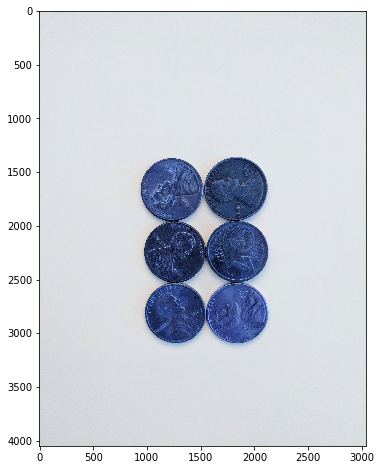

In [125]:
image_pennies = cv2.imread('../../data/raw/Computer-Vision-with-Python_Joseph_Portilla/DATA/pennies.jpg')
display(image_pennies)

### Non-watershed method

In [ ]:
'''
Steps:
  -> Median Blur
  -> Grayscale
  -> Binary Threshold
  -> Find countours


Steps:
1) Read the image
2) Apply blurring (median blurr)
3) Convert to gray scale
4) Apply thresholding (binary inverse + OTSU)
5) Remove noise 
6) Erosion won't help (no use trying it)
7) Find out sure background:
    a) Apply dialation(expand the foreground to some limit(iterations=3) and you know what is left is background, for sure)
8) Find out sure foreground:
    a) Apply distance transform to calculate centers of your objects
    b) Apply threshold to get the sure forefound
9) Find the unknown region (subtract background from foregound)
10) Identify markers using connected_components
11) Apply watershed alogrithm on the markers 
12) Find the countour of the markers
'''

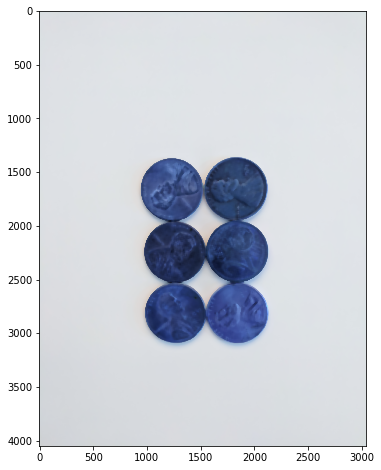

In [14]:
image_pennies_blur = cv2.medianBlur(image_pennies, ksize= 25)
display(image_pennies_blur)

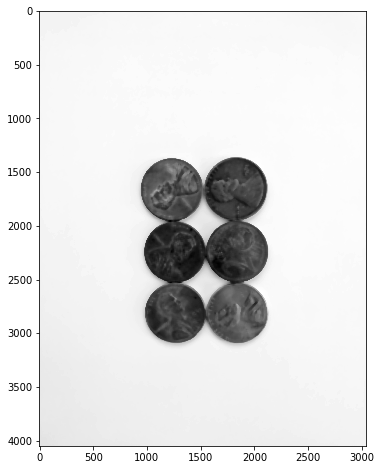

In [17]:
image_pennies_blur_gray = cv2.cvtColor(image_pennies_blur, cv2.COLOR_BGR2GRAY)
display(image_pennies_blur_gray)

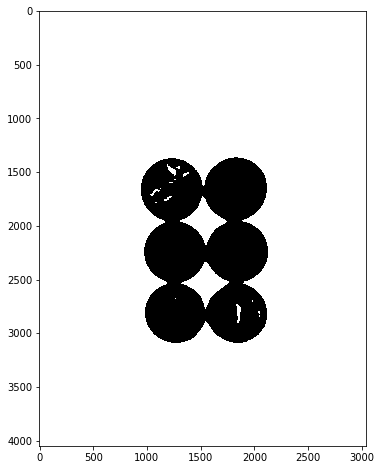

In [29]:
return_value, image_pennies_blur_gray_threshold = cv2.threshold(image_pennies_blur_gray, 127, 255, type=cv2.THRESH_BINARY)
display(image_pennies_blur_gray_threshold)

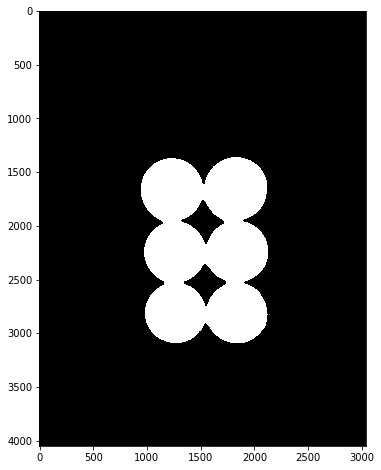

In [30]:
return_value, image_pennies_blur_gray_threshold = cv2.threshold(image_pennies_blur_gray, 160, 255, type=cv2.THRESH_BINARY_INV)
display(image_pennies_blur_gray_threshold)

In [31]:
image_pennies_blur_gray_threshold_copy = image_pennies_blur_gray_threshold.copy()
image_pennies_blur_gray_threshold_countour, countours, hierarchy = cv2.findContours(image_pennies_blur_gray_threshold_copy, mode=cv2.RETR_CCOMP, method=cv2.CHAIN_APPROX_SIMPLE)

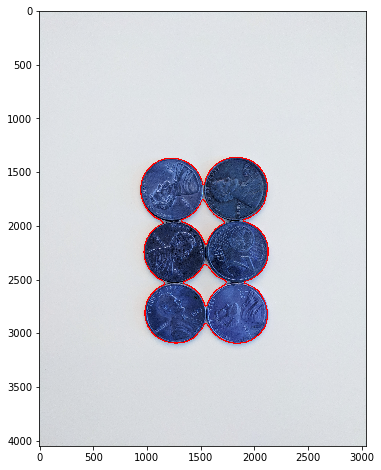

In [35]:
image_pennies_copy = image_pennies.copy()
for i in range(len(countours)):
    cv2.drawContours(image_pennies_copy, countours, i, color=(255,0,0),thickness=10)
display(image_pennies_copy)

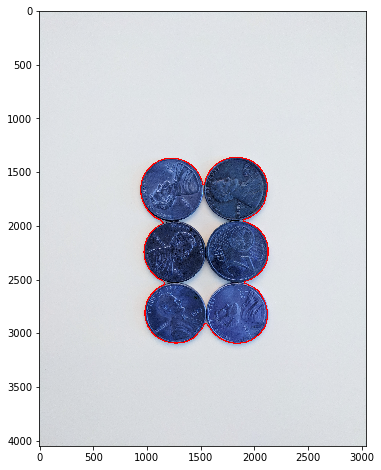

In [37]:
image_pennies_copy2 = image_pennies.copy()
for i in range(len(countours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(image_pennies_copy2, countours, i, color=(255,0,0),thickness=10)
display(image_pennies_copy2)

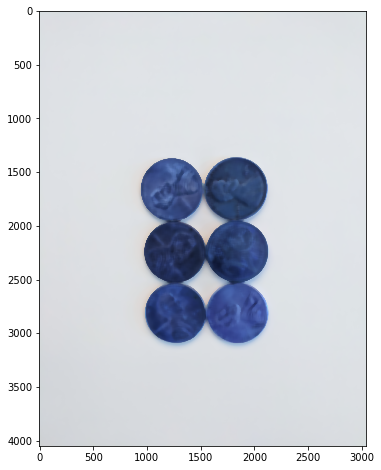

In [42]:
image_pennies_median_blur = cv2.medianBlur(image_pennies, 35)
display(image_pennies_median_blur)

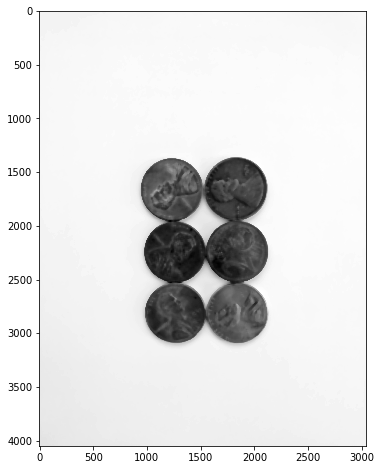

In [44]:
image_pennies_median_blur_gray = cv2.cvtColor(image_pennies_blur, cv2.COLOR_BGR2GRAY)
display(image_pennies_median_blur_gray)

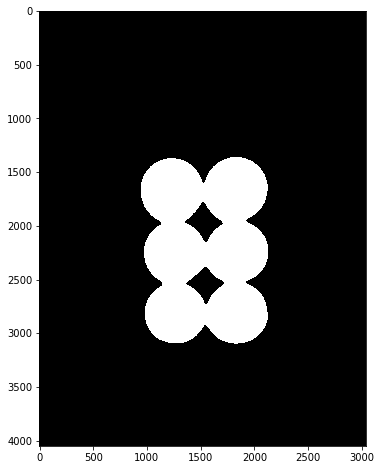

In [77]:
return_value, image_pennies_median_blur_gray_threshold = cv2.threshold(image_pennies_median_blur_gray, 180, 255, cv2.THRESH_BINARY_INV)
display(image_pennies_median_blur_gray_threshold)

#### Otsu's method of thresholding

In [78]:
'''
-> is used to automtically perform clustering-based image thresholding or reduction of a graylevel image to binary image
-> The algorithm assumes that the image contains two classes of pixels(foreground pixels & background pixels); it then calculates
   the optimum threshold seperating the two classes so that their combined spread(intra-class variance) is minimal
-> Directly related to the Jenks otimization method
'''

'\n-> is used to automtically perform clustering-based image thresholding or reduction of a graylevel image to binary image\n-> The algorithm assumes that the image contains two classes of pixels(foreground pixels & background pixels); it then calculates\n   the optimum threshold seperating the two classes so that their combined spread(intra-class variance) is minimal\n-> Directly related to the Jenks otimization method\n'

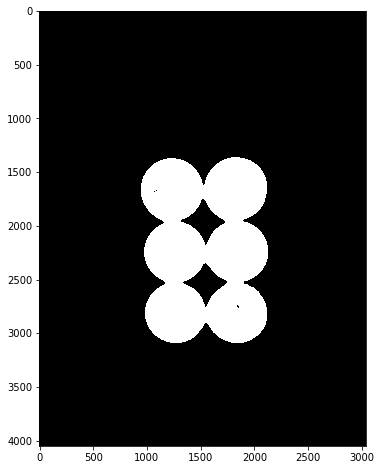

In [86]:
return_value2, image_pennies_median_blur_gray_OTSU_threshold = cv2.threshold(image_pennies_median_blur_gray, 100, 255, cv2.THRESH_BINARY_INV +  cv2.THRESH_OTSU)
display(image_pennies_median_blur_gray_OTSU_threshold)

In [87]:
# Noise removel (optional for this use case)
kernel = np.ones((3,3), np.uint8)
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

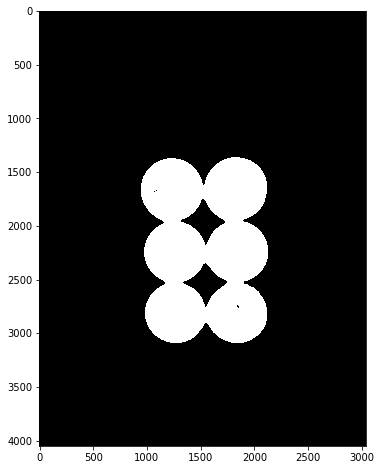

In [88]:
image_pennies_median_blur_gray_OTSU_threshold_opening = cv2.morphologyEx(image_pennies_median_blur_gray_OTSU_threshold, cv2.MORPH_OPEN, kernel, iterations=2)
display(image_pennies_median_blur_gray_OTSU_threshold_opening)

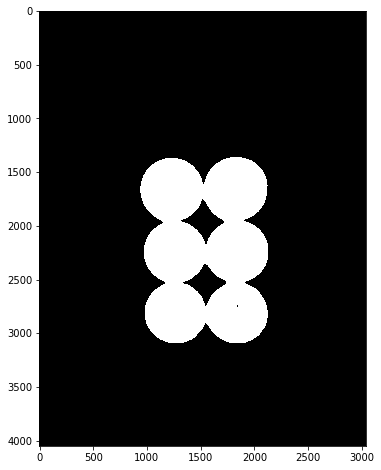

In [116]:
sure_background = cv2.dilate(image_pennies_median_blur_gray_OTSU_threshold_opening, kernel, iterations=3)
display(sure_background)

#### Applying Distance Transform

In [89]:
'''
Distance tranform (aka: distance map or distance field) 
-> The distance transform is an operator normally only applied to binary images. 
-> The result of the transform is a graylevel image that looks similar to the input image, except that 
   the graylevel intensities of points inside foreground regions are changed to show the distance to the closest boundary from each point.
'''

'\nDistance tranform (aka: distance map or distance field) \n-> The distance transform is an operator normally only applied to binary images. \n-> The result of the transform is a graylevel image that looks similar to the input image, except that \n   the graylevel intensities of points inside foreground regions are changed to show the distance to the closest boundary from each point.\n'

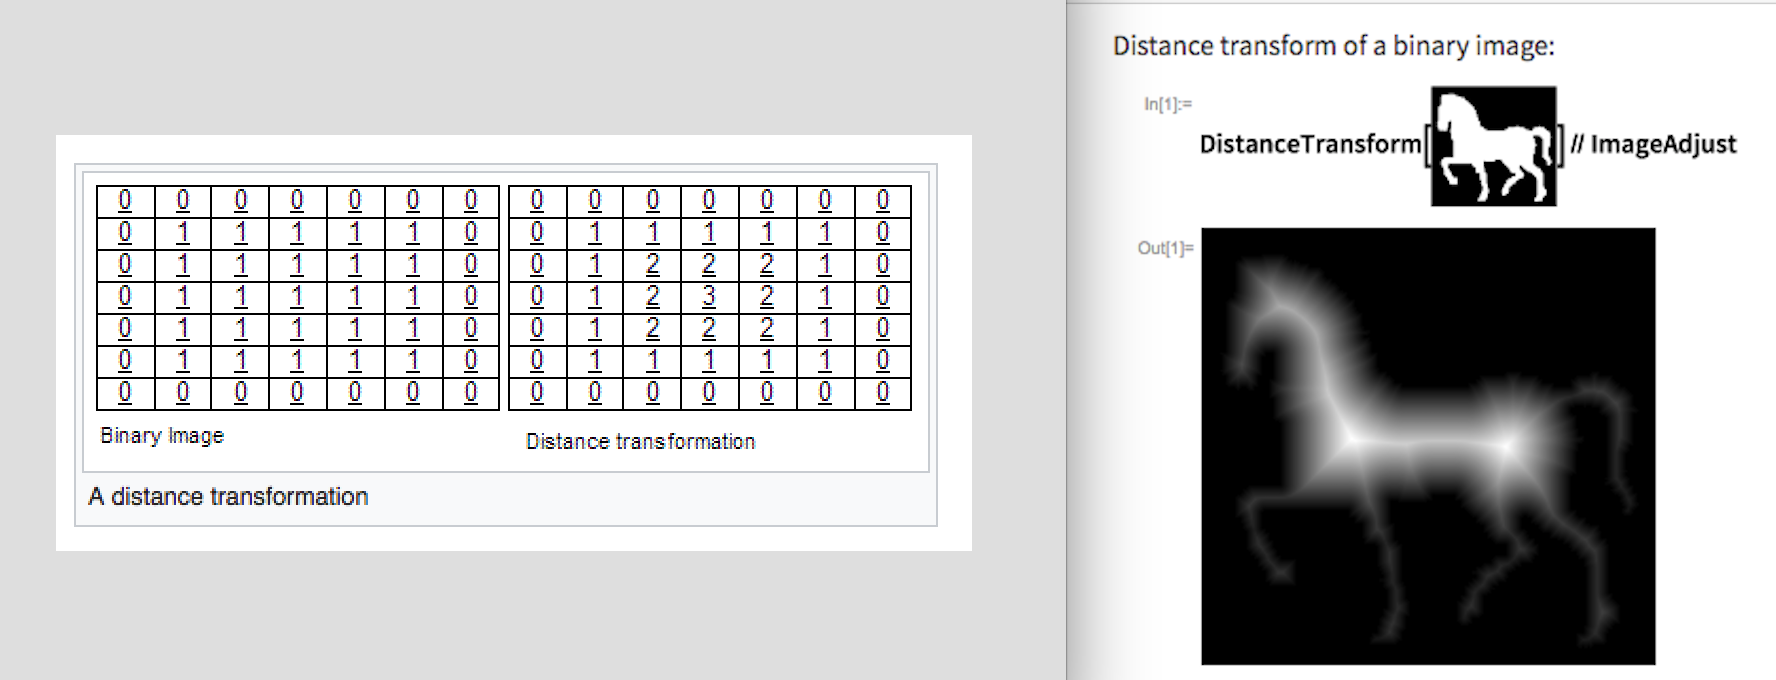

In [141]:
Image(filename='../images/UDEMY_computer_vision_Joseph_Portilla/computer_vision6_object_detection11.png', height=400, width=800)

In [91]:
'''
Docstring:
distanceTransform(src, distanceType, maskSize[, dst[, dstType]]) -> dst
.   @overload
.   @param src 8-bit, single-channel (binary) source image.
.   @param dst Output image with calculated distances. It is a 8-bit or 32-bit floating-point,
.   single-channel image of the same size as src .
.   @param distanceType Type of distance, see #DistanceTypes
.   @param maskSize Size of the distance transform mask, see #DistanceTransformMasks. In case of the
.   #DIST_L1 or #DIST_C distance type, the parameter is forced to 3 because a \f$3\times 3\f$ mask gives
.   the same result as \f$5\times 5\f$ or any larger aperture.
.   @param dstType Type of output image. It can be CV_8U or CV_32F. Type CV_8U can be used only for
.   the first variant of the function and distanceType == #DIST_L1. 
'''

'\nDocstring:\ndistanceTransform(src, distanceType, maskSize[, dst[, dstType]]) -> dst\n.   @overload\n.   @param src 8-bit, single-channel (binary) source image.\n.   @param dst Output image with calculated distances. It is a 8-bit or 32-bit floating-point,\n.   single-channel image of the same size as src .\n.   @param distanceType Type of distance, see #DistanceTypes\n.   @param maskSize Size of the distance transform mask, see #DistanceTransformMasks. In case of the\n.   #DIST_L1 or #DIST_C distance type, the parameter is forced to 3 because a \x0c$3\times 3\x0c$ mask gives\n.   the same result as \x0c$5\times 5\x0c$ or any larger aperture.\n.   @param dstType Type of output image. It can be CV_8U or CV_32F. Type CV_8U can be used only for\n.   the first variant of the function and distanceType == #DIST_L1. \n'

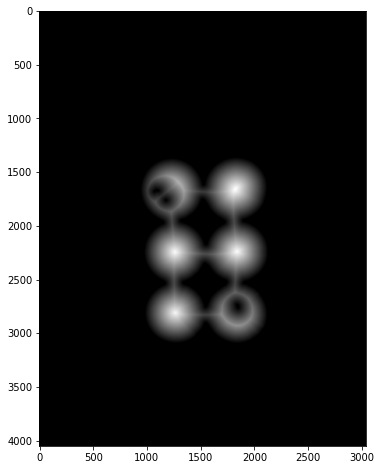

In [105]:
image_pennies_median_blur_gray_OTSU_threshold_opening_distance_transform = cv2.distanceTransform(image_pennies_median_blur_gray_OTSU_threshold_opening,
                                                                                                 distanceType = cv2.DIST_LABEL_CCOMP ,maskSize=0)
display(image_pennies_median_blur_gray_OTSU_threshold_opening_distance_transform)

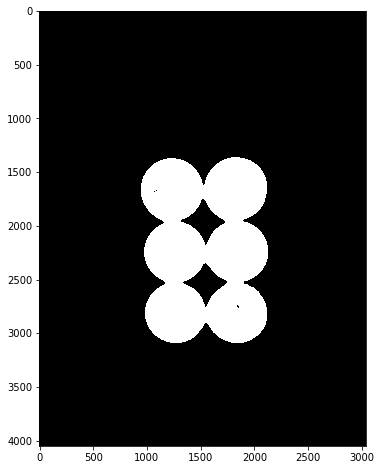

In [113]:
return_value, sure_foreground = cv2.threshold(image_pennies_median_blur_gray_OTSU_threshold_opening_distance_transform, 
                                                  0.0 * image_pennies_median_blur_gray_OTSU_threshold_opening_distance_transform.max(), 255, 0)
display(sure_foreground)

In [114]:
sure_foreground = np.uint8(sure_foreground)

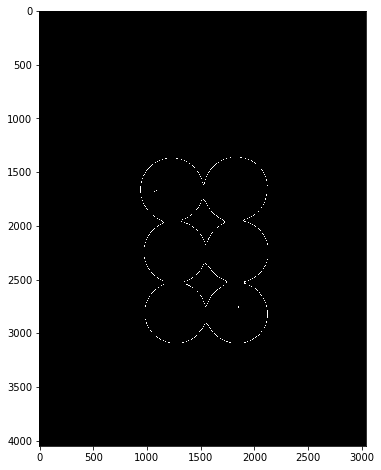

In [117]:
unkown_region = cv2.subtract(sure_background,sure_foreground)
display(unkown_region)

In [119]:
# Make label markers to be used a seeds for the watershed alogorithm to use
'''
Docstring:
connectedComponents(image[, labels[, connectivity[, ltype]]]) -> retval, labels
.   @overload
.   
.   @param image the 8-bit single-channel image to be labeled
.   @param labels destination labeled image
.   @param connectivity 8 or 4 for 8-way or 4-way connectivity respectively
.   @param ltype output image label type. Currently CV_32S and CV_16U are supported.
'''
return_value, markers = cv2.connectedComponents(sure_foreground)
markers

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

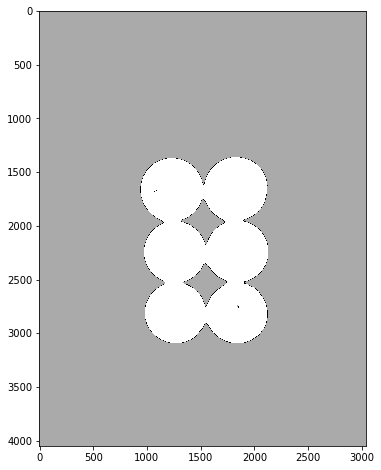

In [121]:
# Mark unkown regions as 0's
markers = markers+1
markers[unkown_region ==255] = 0
display(markers)

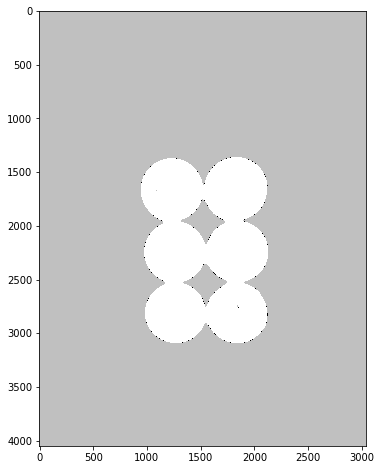

In [123]:
markers = cv2.watershed(image_pennies, markers)
display(markers)

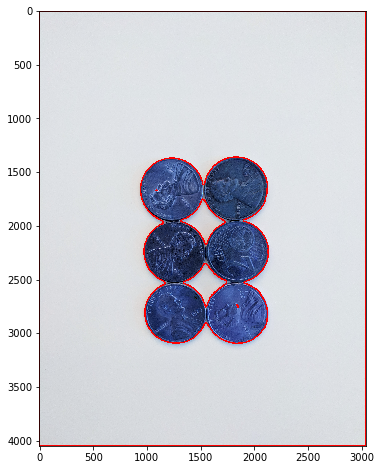

In [126]:
image_pennies_WATERSHED_countour, countours, hierarchy = cv2.findContours(markers, mode=cv2.RETR_CCOMP, method=cv2.CHAIN_APPROX_SIMPLE) 
image_pennies_copy3 = image_pennies.copy()
for i in range(len(countours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(image_pennies_copy3, countours, i, color=(255,0,0),thickness=10)
display(image_pennies_copy3)

#END